In [ ]:
!pip install torch transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 48.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("train.csv")
data.tail(50)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159521,ff5e13378ca9d7a7,Improv\nWhat is the name of the part where the...,0,0,0,0,0,0
159522,ff60fe590399538b,"""\n\nThe bot does keep track, and will not upd...",0,0,0,0,0,0
159523,ff65d85aebea05d0,I certainly noticed you because of the poor ed...,0,0,0,0,0,0
159524,ff66383a2793fa14,"""\n\nSorry I find that there's nothing """"honor...",0,0,0,0,0,0
159525,ff6de7a60ebf8ab0,( I really like this Icon where Can I get it ?),0,0,0,0,0,0
159526,ff6f6919e11cd5f4,request for checkuser \n\nHi\nGot your name fo...,0,0,0,0,0,0
159527,ff7093e953e68d1e,"Ok I am sorry, but I have created some article...",0,0,0,0,0,0
159528,ff739ca9d4a89652,Wikipedia:Articles for deletion/Markus Kaarlon...,0,0,0,0,0,0
159529,ff7464f7913986fc,"""\nWhat do you answer to this: """"Timoshenko wa...",0,0,0,0,0,0
159530,ff74bb5fff05ac53,]]\nCategory:Musicians work group articles nee...,0,0,0,0,0,0


In [ ]:
data['comment_text'][42]

"You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...\n\n1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!\n\n2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!\n\n3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!\n\nBeware of the Dark Side!"

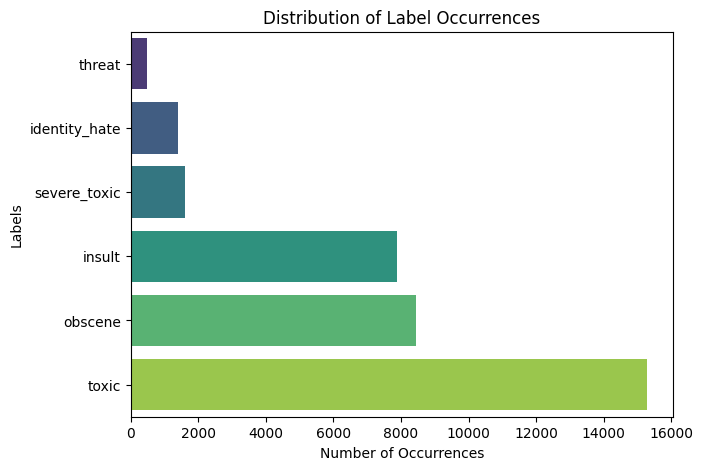

In [ ]:
# Visualizing the class distribution of the 'label' column
column_labels = data.columns.tolist()[2:]
label_counts = data[column_labels].sum().sort_values()


# Create a black background for the plot
plt.figure(figsize=(7, 5))

# Create a horizontal bar plot using Seaborn
ax = sns.barplot(x=label_counts.values,
                 y=label_counts.index, palette='viridis')


# Add labels and title to the plot
plt.xlabel('Number of Occurrences')
plt.ylabel('Labels')
plt.title('Distribution of Label Occurrences')

# Show the plot
plt.show()

In [ ]:
data[column_labels].sum().sort_values()

,0
threat,478
identity_hate,1405
severe_toxic,1595
insult,7877
obscene,8449
toxic,15294


In [ ]:
train_toxic = data[data[column_labels].sum(axis=1) > 0]
train_clean = data[data[column_labels].sum(axis=1) == 0]

In [ ]:
print(train_toxic.shape)
print(train_clean.shape)

(16225, 8)
(143346, 8)


In [ ]:
# Randomly sample 15,000 clean comments
train_clean_sampled = train_clean.sample(n=16225, random_state=42)

# Combine the toxic and sampled clean comments
dataframe = pd.concat([train_toxic, train_clean_sampled], axis=0)

# Shuffle the data to avoid any order bias during training
dataframe = df.sample(frac=1, random_state=42)

In [ ]:
# Split data into training, testing sets & validation sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    dataframe['comment_text'], dataframe.iloc[:, 2:], test_size=0.25, random_state=42)

In [ ]:
# validation set
test_texts, val_texts, test_labels, val_labels = train_test_split(
    test_texts, test_labels, test_size=0.5, random_state=42)

In [ ]:
# Token and Encode Function
def tokenize_and_encode(tokenizer, comments, labels, max_length=128):
    # Initialize empty lists to store tokenized inputs and attention masks
    input_ids = []
    attention_masks = []

    # Iterate through each comment in the 'comments' list
    for comment in comments:

        # Tokenize and encode the comment using the BERT tokenizer
        encoded_dict = tokenizer.encode_plus(
            comment,

            # Add special tokens like [CLS] and [SEP]
            add_special_tokens=True,

            # Truncate or pad the comment to 'max_length'
            max_length=max_length,

            # Pad the comment to 'max_length' with zeros if needed
            pad_to_max_length=True,

            # Return attention mask to mask padded tokens
            return_attention_mask=True,

            # Return PyTorch tensors
            return_tensors='pt'
        )

        # Append the tokenized input and attention mask to their respective lists
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    # Concatenate the tokenized inputs and attention masks into tensors
    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    # Convert the labels to a PyTorch tensor with the data type float32
    labels = torch.tensor(labels, dtype=torch.float32)

    # Return the tokenized inputs, attention masks, and labels as PyTorch tensors
    return input_ids, attention_masks, labels

In [ ]:
# Token Initialization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                          do_lower_case=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Model Initialization
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                                      num_labels=6)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Move model to GPU if available
device = torch.device(
    'cuda') if torch.cuda.is_available() else torch.device('cpu')
model = model.to(device)

In [ ]:
# Tokenize and Encode the comments and labels for the training set
input_ids, attention_masks, labels = tokenize_and_encode(
    tokenizer,
    train_texts,
    train_labels.values
)

# Tokenize and Encode the comments and labels for the test set
test_input_ids, test_attention_masks, test_labels = tokenize_and_encode(
    tokenizer,
    test_texts,
    test_labels.values
)

# Tokenize and Encode the comments and labels for the validation set
val_input_ids, val_attention_masks, val_labels = tokenize_and_encode(
    tokenizer,
    val_texts,
    val_labels.values
)


print('Training Comments :',train_texts.shape)
print('Input Ids         :',input_ids.shape)
print('Attention Mask    :',attention_masks.shape)
print('Labels            :',labels.shape)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Training Comments : (24337,)
Input Ids         : torch.Size([24337, 128])
Attention Mask    : torch.Size([24337, 128])
Labels            : torch.Size([24337, 6])


In [ ]:
# Creating DataLoader for the balanced dataset
batch_size = 32
train_dataset = TensorDataset(input_ids, attention_masks, labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# testing set
test_dataset = TensorDataset(test_input_ids, test_attention_masks, test_labels)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# validation set
val_dataset = TensorDataset(val_input_ids, val_attention_masks, val_labels)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Optimizer setup
optimizer = AdamW(model.parameters(), lr=2e-5)

In [ ]:
# Function to Train the Model
def train_model(model, train_loader, optimizer, device, num_epochs):
    # Loop through the specified number of epochs
    for epoch in range(num_epochs):
        # Set the model to training mode
        model.train()
        # Initialize total loss for the current epoch
        total_loss = 0

        # Loop through the batches in the training data
        for batch in train_loader:
            input_ids, attention_mask, labels = [t.to(device) for t in batch]

            optimizer.zero_grad()

            outputs = model(
                input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()

            loss.backward()
            optimizer.step()

        model.eval()  # Set the model to evaluation mode
        val_loss = 0

        # Disable gradient computation during validation
        with torch.no_grad():
            for batch in val_loader:
                input_ids, attention_mask, labels = [
                    t.to(device) for t in batch]

                outputs = model(
                    input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss
                val_loss += loss.item()
        # Print the average loss for the current epoch
        print(
            f'Epoch {epoch+1}, Training Loss: {total_loss/len(train_loader)},Validation loss:{val_loss/len(val_loader)}')


# Call the function to train the model
train_model(model, train_loader, optimizer, device, num_epochs=5)

Epoch 1, Training Loss: 0.0844962784063448,Validation loss:0.1730947382748127
Epoch 2, Training Loss: 0.06319875272208735,Validation loss:0.19955228409898562
Epoch 3, Training Loss: 0.046222594395309256,Validation loss:0.20990671757168658
Epoch 4, Training Loss: 0.034316569472492994,Validation loss:0.24073853478656979
Epoch 5, Training Loss: 0.02691468952924904,Validation loss:0.26075992639374546


In [ ]:
# Evaluate the Model
def evaluate_model(model, test_loader, device):
    model.eval()  # Set the model to evaluation mode

    true_labels = []
    predicted_probs = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = [t.to(device) for t in batch]

            # Get model's predictions
            outputs = model(input_ids, attention_mask=attention_mask)
            # Use sigmoid for multilabel classification
            predicted_probs_batch = torch.sigmoid(outputs.logits)
            predicted_probs.append(predicted_probs_batch.cpu().numpy())

            true_labels_batch = labels.cpu().numpy()
            true_labels.append(true_labels_batch)

    # Combine predictions and labels for evaluation
    true_labels = np.concatenate(true_labels, axis=0)
    predicted_probs = np.concatenate(predicted_probs, axis=0)
    predicted_labels = (predicted_probs > 0.5).astype(
        int)  # Apply threshold for binary classification

    # Calculate evaluation metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='micro')
    recall = recall_score(true_labels, predicted_labels, average='micro')

    # Print the evaluation metrics
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')


# Call the function to evaluate the model on the test data
evaluate_model(model, test_loader, device)

Accuracy: 0.6889
Precision: 0.7866
Recall: 0.8643


In [ ]:
# Save the tokenizer and model in the same directory
output_dir = "/content/drive/MyDrive/Bert/Saved_Bert_model_for_toxic_comment_classification"
# Save model's state dictionary and configuration
model.save_pretrained(output_dir)
# Save tokenizer's configuration and vocabulary
tokenizer.save_pretrained(output_dir)

('/content/drive/MyDrive/Bert/Saved_Bert_model_for_toxic_comment_classification/tokenizer_config.json',
 '/content/drive/MyDrive/Bert/Saved_Bert_model_for_toxic_comment_classification/special_tokens_map.json',
 '/content/drive/MyDrive/Bert/Saved_Bert_model_for_toxic_comment_classification/vocab.txt',
 '/content/drive/MyDrive/Bert/Saved_Bert_model_for_toxic_comment_classification/added_tokens.json')

In [ ]:
# Load the tokenizer and model from the saved directory
model_name = "/content/drive/MyDrive/Bert/Saved_Bert_model_for_toxic_comment_classification"
Bert_Tokenizer = BertTokenizer.from_pretrained(model_name)
Bert_Model = BertForSequenceClassification.from_pretrained(
    model_name).to(device)

In [ ]:
def predict_user_input(input_text, model=Bert_Model, tokenizer=Bert_Tokenizer, device=device):
    user_input = [input_text]

    user_encodings = tokenizer(
        user_input, truncation=True, padding=True, return_tensors="pt")

    user_dataset = TensorDataset(
        user_encodings['input_ids'], user_encodings['attention_mask'])

    user_loader = DataLoader(user_dataset, batch_size=1, shuffle=False)

    model.eval()
    with torch.no_grad():
        for batch in user_loader:
            input_ids, attention_mask = [t.to(device) for t in batch]
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            predictions = torch.sigmoid(logits)

    # Convert NumPy int64 to Python int
    predicted_labels = (predictions.cpu().numpy() > 0.5).astype(int)
    labels_list = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
    result = {label: int(pred) for label, pred in zip(labels_list, predicted_labels[0])}
    return result



text = 'Are you insane!'
predict_user_input(input_text=text)

{'toxic': 1,
 'severe_toxic': 0,
 'obscene': 0,
 'threat': 0,
 'insult': 1,
 'identity_hate': 0}

In [ ]:
text = "You worthless [slur], I swear I’ll come to your house and make you regret being born. People like you are the scum of the earth — you don't deserve to exist."
predict_user_input(model=Bert_Model,
                   tokenizer=Bert_Tokenizer,
                   input_text=text,
                   device=device)

{'toxic': 1,
 'severe_toxic': 0,
 'obscene': 1,
 'threat': 0,
 'insult': 1,
 'identity_hate': 0}

{'toxic': 1,
 'severe_toxic': 0,
 'obscene': 0,
 'threat': 0,
 'insult': 0,
 'identity_hate': 0}

In [ ]:
text = "Such an Idiot person"
predict_user_input(model=Bert_Model,
                   tokenizer=Bert_Tokenizer,
                   input_text=text,
                   device=device)

{'toxic': 1,
 'severe_toxic': 0,
 'obscene': 1,
 'threat': 0,
 'insult': 1,
 'identity_hate': 0}

In [ ]:
text = "Such an Great person"
predict_user_input(model=Bert_Model,
                   tokenizer=Bert_Tokenizer,
                   input_text=text,
                   device=device)

{'toxic': 0,
 'severe_toxic': 0,
 'obscene': 0,
 'threat': 0,
 'insult': 0,
 'identity_hate': 0}

In [ ]:
text = "Long Live Pakistan"
predict_user_input(model=Bert_Model,
                   tokenizer=Bert_Tokenizer,
                   input_text=text,
                   device=device)

{'toxic': 0,
 'severe_toxic': 0,
 'obscene': 0,
 'threat': 0,
 'insult': 0,
 'identity_hate': 0}

In [ ]:
text = "you are a Dumb person"
predict_user_input(model=Bert_Model,
                   tokenizer=Bert_Tokenizer,
                   input_text=text,
                   device=device)

{'toxic': 1,
 'severe_toxic': 0,
 'obscene': 0,
 'threat': 0,
 'insult': 1,
 'identity_hate': 0}